In [1]:
import sys
sys.path = [p for p in sys.path if '.local' not in p]
import pandas as pd
import os.path as osp
from glob import glob
import numpy as np
from scipy.stats import ks_2samp
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
OUT = 'Analysis'
NORM = 'Normalization'
FS = 'Feature_Selection'
DAT = 'Data'
FIG = 'Figures'

# Figure 2 (b, d)

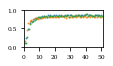

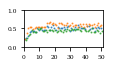

In [124]:

frac=0.2
shift_d = {'UU':-0.2,'WC':0,'WU':0.2}
nfeat_l = np.arange(0,51,10).astype(int)
for KIND in ['GeneExp','HiC']:
    figd = '%s/%s' % (KIND,FIG)
    fig = plt.figure()
    ax = fig.add_axes([.2,.2,.7,.65])
    for alg in ['UU','WC','WU']:
        X = pd.read_pickle('%s/%s/nfeat_loopct_%s-%.2f_d.pkl' % (KIND,OUT,alg,frac))
        res_l = [{'n':k,'mu':v['Stats'].Accuracy.mean(),
                  'lq':v['Stats'].Accuracy.quantile(0.25),
                  'uq':v['Stats'].Accuracy.quantile(0.75),
                  'sig':v['Stats'].Accuracy.std(ddof=1)} for k,v in X.items()]
        res_df = pd.DataFrame(res_l)
        err_arr = np.vstack([res_df.uq-res_df.mu,res_df.mu-res_df.lq])
        ax.plot(res_df.n+shift_d[alg],res_df.mu,ls='',marker='o',color=clr_d[alg],markersize=1,alpha=0.7)
    ax.set_xlim(0,51)
    ax.set_ylim(0,1)
    ax.set_xticks(nfeat_l)
    ax.set_xticklabels(['%d' % f for f in nfeat_l])
    ax.set_yticks(np.linspace(0,1,3))
    ax.set_yticklabels(['%.1f' % f for f in np.linspace(0,1,3)])
    plt.setp(ax.get_xticklabels(),fontsize=6,family='serif')
    plt.setp(ax.get_yticklabels(),fontsize=6,family='serif')
    fig.savefig('%s/nfeat_loopct_%.2f_%s.svg' % (figd,frac,KIND))


# Figure 2 (a, c)

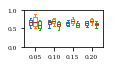

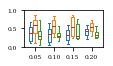

In [128]:
alg_l = ['UU','WC','WU']
kind_l = ['GeneExp','HiC']
clr_d = {'UU':'#1f77b4','WC':'#ff7f0e','WU':'#2ca02c'}
shift_d = {'UU':-0.0125,'WC':0,'WU':0.0125}
frac_l = np.linspace(0.05,0.2,4)
for kind in ['GeneExp','HiC']:
    nfeat = 3 if kind=='HiC' else 4
    lbl_hndl_d = {}
    figd = '%s/%s' % (kind,FIG)
    fig = plt.figure()
    ax = fig.add_axes([.2,.2,.7,.65])
    for alg in alg_l:
        frac_ser_d = {}
        for frac in frac_l:
            sel_fn = '%s/%s/nfeat_loopct_%s-%.2f_d.pkl' % (kind,OUT,alg,frac)
            sel_acc = pd.read_pickle(sel_fn)[nfeat]['Stats'].Accuracy
            frac_ser_d[frac]=sel_acc
        myd = ax.boxplot(frac_ser_d.values(),
                         boxprops={'color':clr_d[alg]},
                         whis=[5,95],
                         medianprops={'color':'#d62728'},
                         whiskerprops={'color':clr_d[alg]},
                         capprops={'color':clr_d[alg]},
                         positions=np.array(frac_ser_d.keys())+shift_d[alg],
                         widths=0.008,
                         showfliers=False)
        lbl_hndl_d[alg]=myd
    ax.set_xlim(0.02,0.23)
    ax.set_ylim(0,1)
    ax.set_xticks(frac_l)
    ax.set_xticklabels(['%.2f' % f for f in frac_l])
    ax.set_yticks(np.linspace(0,1,3))
    ax.set_yticklabels(['%.1f' % f for f in np.linspace(0,1,3)])
    plt.setp(ax.get_xticklabels(),fontsize=6,family='serif')
    plt.setp(ax.get_yticklabels(),fontsize=6,family='serif')
    fig.savefig('%s/loopct_%d.svg' % (figd,nfeat))

# Figure 2 (a, c) significance

In [118]:
from itertools import combinations
alg_l = ['UU','WC','WU']
for kind in ['GeneExp','HiC']:
    nfeat = 3 if kind=='HiC' else 4
    print '\n',kind,'\n'
    for frac in frac_l:
        my_d = {}
        for alg in alg_l:
            sel_fn = '%s/%s/nfeat_loopct_%s-%.2f_d.pkl' % (kind,OUT,alg,frac)
            sel_acc = pd.read_pickle(sel_fn)[nfeat]['Stats'].Accuracy
            my_d[alg] = sel_acc
        my_df = pd.DataFrame(my_d)
        print '\n%.2f\n' % frac
        for alg1,alg2 in combinations(alg_l,2):
            print alg1,'\t',alg2,'\t%.2f' % ks_2samp(my_df.loc[:,alg1],my_df.loc[:,alg2])[1]


GeneExp 


0.05

UU 	WC 	0.24
UU 	WU 	0.03
WC 	WU 	0.12

0.10

UU 	WC 	0.24
UU 	WU 	0.24
WC 	WU 	0.01

0.15

UU 	WC 	0.00
UU 	WU 	0.24
WC 	WU 	0.00

0.20

UU 	WC 	0.03
UU 	WU 	0.65
WC 	WU 	0.00

HiC 


0.05

UU 	WC 	0.12
UU 	WU 	0.41
WC 	WU 	0.00

0.10

UU 	WC 	0.03
UU 	WU 	0.24
WC 	WU 	0.00

0.15

UU 	WC 	0.03
UU 	WU 	0.24
WC 	WU 	0.12

0.20

UU 	WC 	0.00
UU 	WU 	0.03
WC 	WU 	0.00


# Table 1 Success Rates

## Values for approaches developed in the paper

In [41]:
kind_l = ['GeneExp','HiC']
meth_l = ['SVC','WC','WU','UU','RF']
for kind in kind_l:
    print '\n%s\n' % kind
    for meth in meth_l:
        Z = pd.read_pickle('%s/%s/nfeat_loo_%s_d.pkl' % (kind,OUT,meth))
        DF = pd.DataFrame([{'n':_i,'SuccessRate':(df.Actual==df.Predicted).mean(),
                            'AvgProb':df.Prob.mean()} for _i,df in Z.items()])
        DF = DF.set_index('n')
        print '%s\t%.1f\t%d' % (meth,100*DF.SuccessRate.max(),DF.SuccessRate.idxmax())


GeneExp

SVC	57.8	8
WC	68.4	35
WU	70.7	50
UU	71.4	47
RF	39.9	37

HiC

SVC	43.7	5
WC	63.4	24
WU	47.0	37
UU	53.6	39
RF	38.0	16


## HNN values

In [46]:
for kind in kind_l:
    print '%s\t%.1f' % (kind,100*pd.read_pickle('%s/%s/%s_stoch_ser.pkl' % (kind,OUT,kind)).mean())

GeneExp	5.6
HiC	11.5


## PDM values
run "python tableI_analysis.py" to get the PDM values

# Table 2 Success Rates

In [31]:
import numpy as np
alg_l = ['UU','WC','WU']
kind_l = ['GeneExp','HiC']    
for kind in kind_l:
    print '\n',kind,'\n'
    nfeat = 4 if kind=='GeneExp' else 3
    for alg in alg_l:
        print '\n',alg,'\n'
        for meth in ['dists','loo','ncv']:
            if meth=='dists':
                fn = '%s/%s/top_%s_%s.pkl' % (kind,OUT,meth,alg)
                X = pd.read_pickle(fn)
                col = X.loc[:,nfeat]
                N = 100*(1-(col>0).mean())
                N_c = col.shape[0]
            elif meth=='loo':
                fn = '%s/%s/nfeat_%s_%s_d.pkl' % (kind,OUT,meth,alg)
                X = pd.read_pickle(fn)[nfeat]
                N = 100*(X.Actual==X.Predicted).mean()
                N_c = X.shape[0]
            elif meth=='ncv':
                fn = '%s/%s/%s_%s.pkl' % (kind,OUT,meth,alg)
                X = pd.read_pickle(fn).loc[:,nfeat]
                N = X.mean()*100
                N_c = 10000*X.shape[0]
            print '%s\t%.1f\t%d' % (meth,N,N_c)



GeneExp 


UU 

dists	92.8	10302
loo	51.8	3109
ncv	72.5	1020000

WC 

dists	96.4	10302
loo	57.9	3109
ncv	77.5	1020000

WU 

dists	94.6	10302
loo	51.8	3109
ncv	72.4	1020000

HiC 


UU 

dists	70.0	110
loo	27.4	453
ncv	68.6	110000

WC 

dists	93.6	110
loo	52.8	453
ncv	89.5	110000

WU 

dists	81.8	110
loo	36.9	453
ncv	66.1	110000


# Gather results (pairwise distance/KNN CV)

In [24]:
alg_l = ['UU','WC','WU']
kind_l = ['GeneExp','HiC'] 
## nonconvexity results
for kind in kind_l:
    for alg in alg_l:
        if osp.exists('%s/%s/ncv_%s.pkl' % (kind,OUT,alg)):
            continue
        myd = {}
        for fn in glob('%s/%s/ncv_%s_*.pkl' % (kind,OUT,alg)):
            nf = int(fn.split('.')[0].split('_')[-1])
            ser = pd.read_pickle(fn)
            myd[nf]=ser
        df = pd.DataFrame(myd)
        df.to_pickle('%s/%s/ncv_%s.pkl' % (kind,OUT,alg))
        

In [23]:
## distance/pairwise classification results
for kind in kind_l:
    for alg in alg_l:
        from glob import glob
        ML_list = glob('%s/%s/top*_dists_%s_ML.pkl' % (kind,OUT,alg))
        dist_list = glob('%s/%s/top*_dists_%s.pkl' % (kind,OUT,alg))
        if not osp.exists('%s/%s/top_ML_%s.pkl' % (kind,OUT,alg)):
            ext_ML_d = {}
            for MLfn in ML_list:
                ml_ser = pd.read_pickle(MLfn)
                nfeat = MLfn.split('_')[3]
                ext_ML_d[int(nfeat)]=ml_ser.stack()
            ext_ML_df = pd.DataFrame(ext_ML_d)
            ext_ML_df.to_pickle('%s/%s/top_ML_%s.pkl' % (kind,OUT,alg))
        if not osp.exists('%s/%s/top_dists_%s.pkl' %  (kind,OUT,alg)):
            ext_dist_d = {}            
            for distfn in dist_list:
                dist_ser = pd.read_pickle(distfn)
                nfeat = distfn.split('_')[3].split('.')[0]
                ctf_gb = dist_ser.groupby(level=0)
                ctt_dist_d = {}
                for ctf,grp in ctf_gb:
                    cti_gb = grp.groupby(level=1)
                    win_ct = grp.xs(ctf,level=1)
                    for cti,grp2 in cti_gb:
                        if cti==ctf:
                            continue
                        novr_ser = pd.Series(np.sum(grp2.values<win_ct.values,axis=0),index=grp2.columns)
                        ctt_dist_d[(ctf,cti)]=novr_ser.sum()
                ext_dist_d[int(nfeat)]=pd.Series(ctt_dist_d)
            ext_dist_df = pd.DataFrame(ext_dist_d)
            ext_dist_df.to_pickle('%s/%s/top_dists_%s.pkl' % (kind,OUT,alg))
    

## Figure 3 (a, b) and Supplemental Figures S2-S6

Run plot_overlap.py

## Supplemental tables of tick labels

In [39]:
kind='GeneExp'
data = pd.read_pickle('%s/%s/nonseq_bc_corr_data.pkl' % (kind,OUT))
vcs = pd.Categorical(data.index.get_level_values(1)).value_counts()
X = vcs.loc[all_ct_l].reset_index()
X.columns = ['Cell type','N']
X.index = X.index+1
X.index.name='Order'
ind_grp_d = {}
for grp,ct_l in cat_ct_d.items():
    for ct in ct_l:
        ind_grp_d[all_ct_l.index(ct)+1]=grp
X['Group'] = pd.Series(ind_grp_d)

with open('%s/%s/tick_labels_loo_%s.tex' % (kind,OUT,kind),'w') as fh:
    fh.write(X.to_latex())

In [41]:
ct_grp_d = pd.read_pickle('%s/%s/ct_groupings_d.pkl' % (kind,DAT))
grp_len_d = {}
for grpId,ct_l in ct_grp_d.items():
    sel = data.index.get_level_values(1).isin(ct_l)
    grp_len_d[grpId] = data[sel].shape[0]

grp_len_ser = pd.Series(grp_len_d).sort_values(ascending=False)

grp_len_ser = grp_len_ser.loc[grp_ct_l]
XX = grp_len_ser.reset_index()
XX.columns = ['Cell Type','N']
XX.index = XX.index+1
XX.index.name='Order'
with open('%s/%s/tick_labels_tiered_%s.tex' % (kind,OUT,kind),'w') as fh:
    fh.write(XX.to_latex())

,Cell Type,N
Order,,
1,breast_cancers,684
2,epithelial_cells,524
3,colon_cancers,454
4,stem_cells,324
5,lung_cancers,261


In [42]:
kind = 'HiC'
data = pd.read_pickle('%s/%s/%s_corr_data.pkl' % (kind,NORM,kind))
vcs = pd.Categorical(data.index.get_level_values(1)).value_counts()
vcs = vcs.sort_values(ascending=False)
XXX = vcs.reset_index()
XXX.columns = ['Cell Type','N']
XXX.index = XXX.index+1
XXX.index.name='Order'
with open('%s/%s/tick_labels_loo_%s.tex' % (kind,OUT,kind),'w') as fh:
    fh.write(XXX.to_latex())

,Cell Type,N
Order,,
1,B-cell: GM12878,112
2,HCT-116,72
3,K562,48
4,MDM,41
5,IMR90,40


## PCA comparison (Fig. S7)

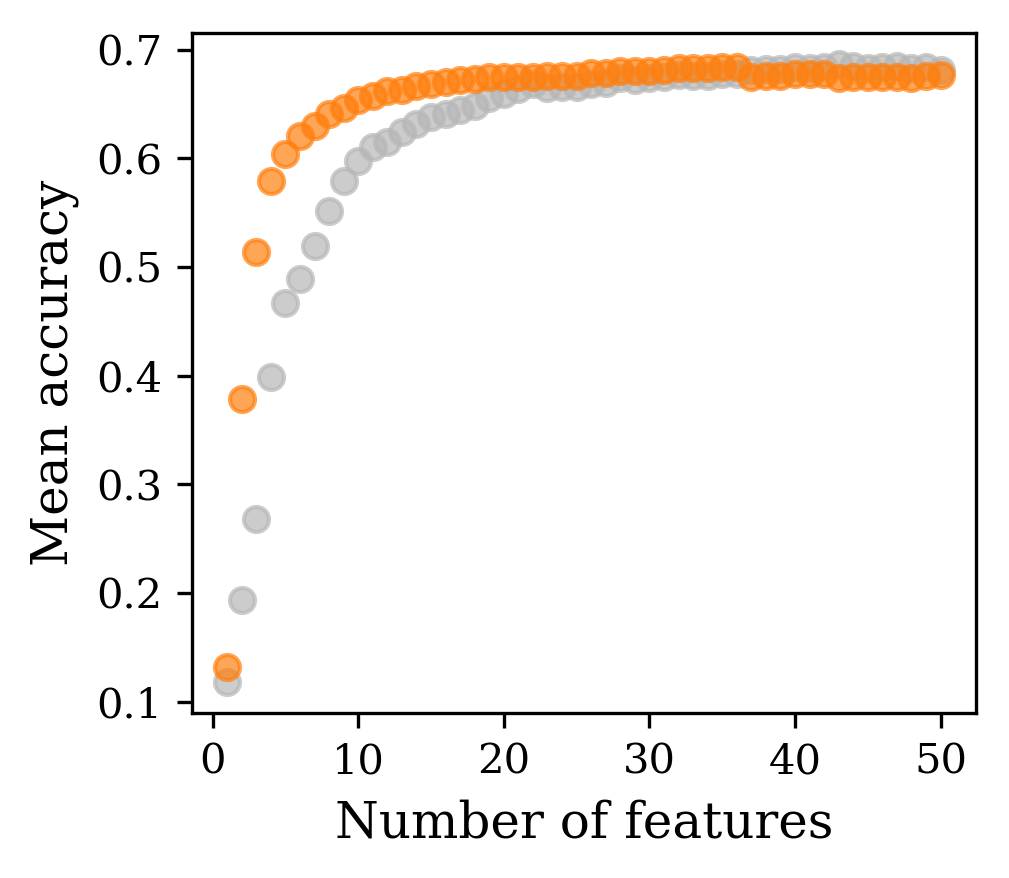

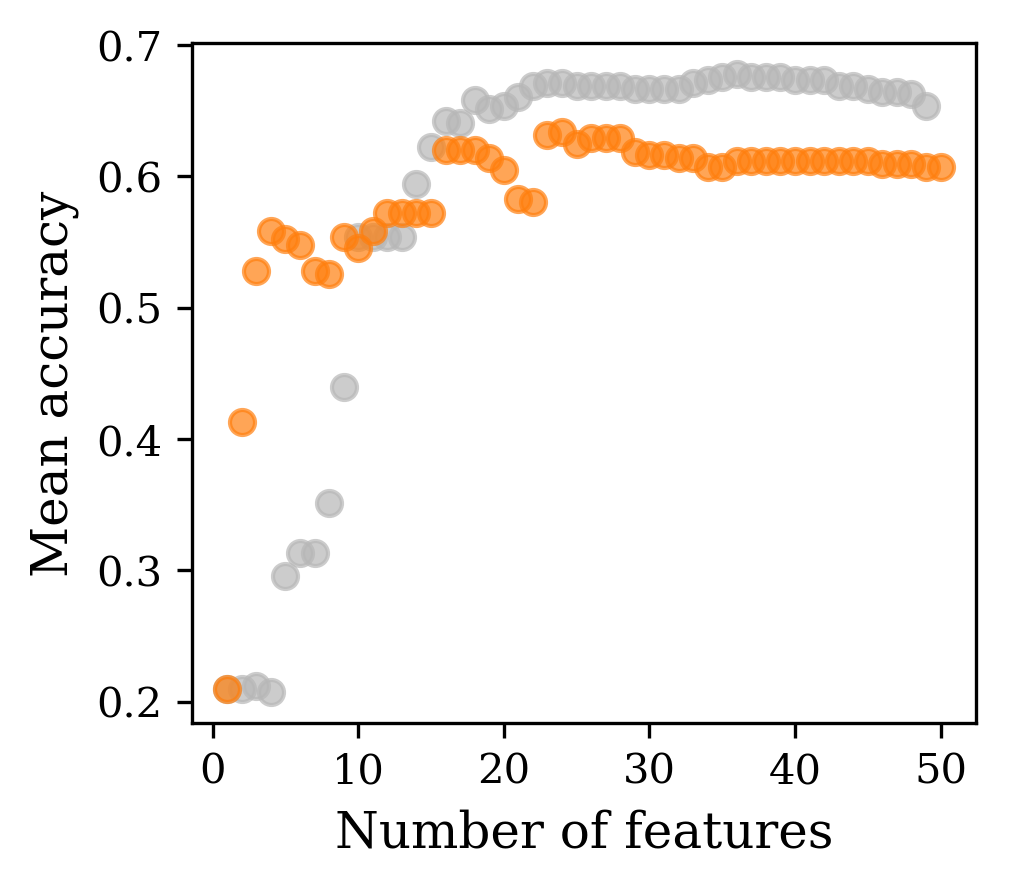

In [66]:
#X = pd.read_pickle('GeneExp/Output/ncvfreq_WC_4.pkl')
clr_d = {'UU':'#1f77b4','WC':'#ff7f0e','WU':'#2ca02c','PCA':'#b7b7b7'}
for kind in kind_l:
    fig = plt.figure(figsize=(3.375,3),dpi=300)
    ax = fig.add_subplot(111)
    X = pd.read_pickle('%s/%s/nfeat_loo_PCA_d.pkl' % (kind,OUT))
    pca_d = dict([(_n,(df.Actual==df.Predicted).mean()) for _n,df in X.items()])
    pca_ser = pd.Series(pca_d)
    Y = pd.read_pickle('%s/%s/nfeat_loo_WC_d.pkl' % (kind,OUT))
    wc_d = dict([(_n,(df.Actual==df.Predicted).mean()) for _n,df in Y.items()])
    wc_ser = pd.Series(wc_d)
    ax.plot(pca_ser.index,pca_ser.values,ls='',marker='o',alpha=0.7, color = '#b7b7b7')
    ax.plot(wc_ser.index,wc_ser.values,ls='',marker='o',alpha=0.7, color = '#ff7f0e')
    plt.setp(ax.get_xticklabels(),fontsize=10,family='serif')
    plt.setp(ax.get_yticklabels(),fontsize=10,family='serif')
    ax.set_xlabel('Number of features',family='serif',size=12)
    ax.set_ylabel('Mean accuracy',family='serif',size=12)
    fig.savefig('%s/%s/pca_comparison_%s.svg' % (kind,FIG))

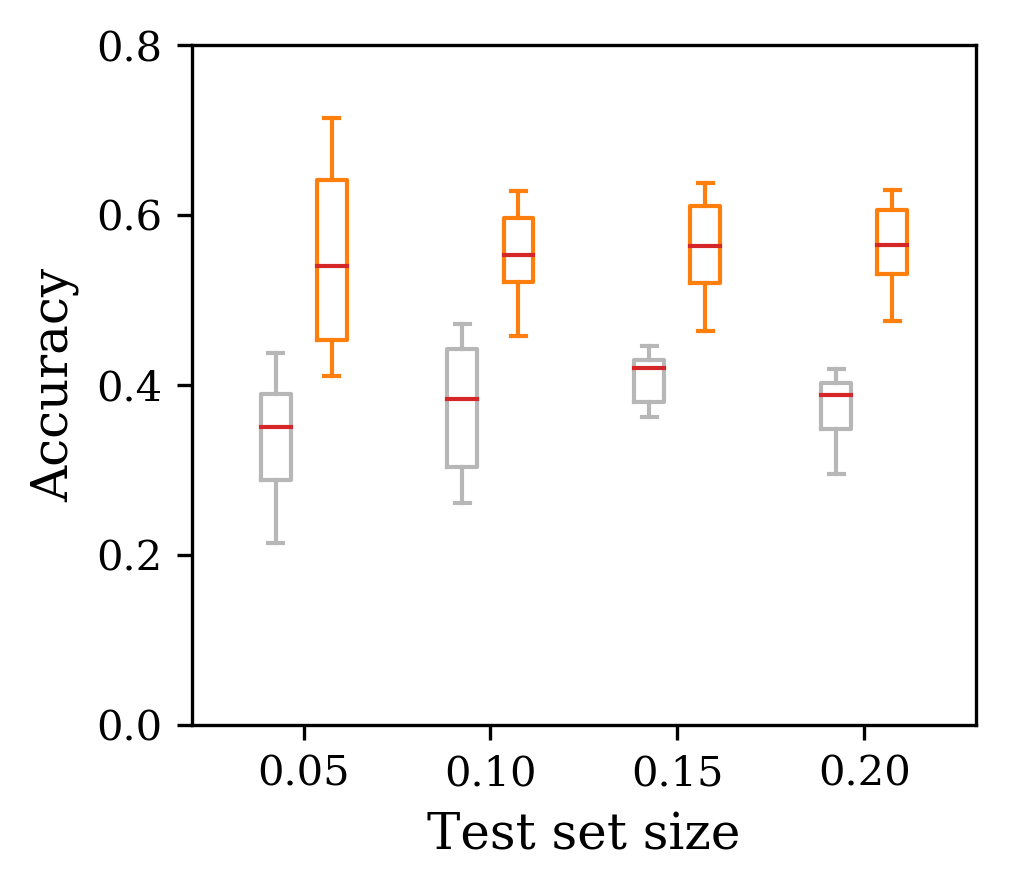

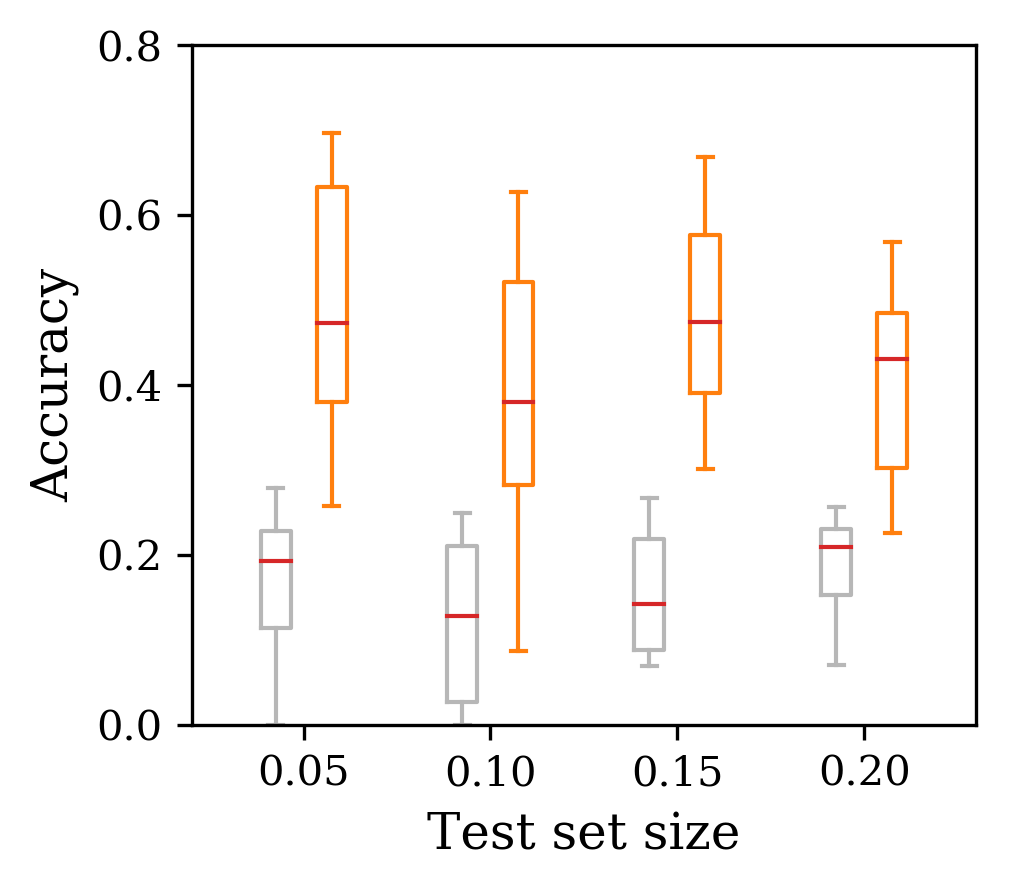

In [61]:
shift_d = {'PCA':-0.0075,'WC':0.0075}
figd = '%s/%s' % (kind,FIG)
frac_l = np.linspace(0.05,0.2,4)
for kind in ['GeneExp','HiC']:
    nfeat = 3 if kind=='HiC' else 4
    lbl_hndl_d = {}
    fig = plt.figure(figsize=(3.375,3),dpi=300)
    ax = fig.add_subplot(111)
    for alg in ['PCA','WC']:
        frac_ser_d = {}
        for frac in frac_l:
            sel_fn = '%s/%s/nfeat_loopct_%s-%.2f_d.pkl' % (kind,OUT,alg,frac)
            sel_acc = pd.read_pickle(sel_fn)[nfeat]['Stats'].Accuracy
            frac_ser_d[frac]=sel_acc
        myd = ax.boxplot(frac_ser_d.values(),
                         boxprops={'color':clr_d[alg]},
                         whis=[5,95],
                         medianprops={'color':'#d62728'},
                         whiskerprops={'color':clr_d[alg]},
                         capprops={'color':clr_d[alg]},
                         positions=np.array(frac_ser_d.keys())+shift_d[alg],
                         widths=0.008,
                         showfliers=False)
        lbl_hndl_d[alg]=myd
    ax.set_xlim(0.02,0.23)
    ax.set_ylim(0,1)
    ax.set_xticks(frac_l)
    ax.set_xticklabels(['%.2f' % f for f in frac_l])
    ax.set_yticks(np.linspace(0,1,5))
    ax.set_yticklabels(['%.1f' % f for f in np.linspace(0,1,6)])
    plt.setp(ax.get_xticklabels(),fontsize=10,family='serif')
    plt.setp(ax.get_yticklabels(),fontsize=10,family='serif')
    ax.set_xlabel('Test set size',fontsize=12,family='serif')
    ax.set_ylabel('Accuracy',fontsize=12,family='serif')
    fig.savefig('%s/loopct_pca_%s.svg' % (figd,kind))
    

In [65]:
for kind in ['GeneExp','HiC']:
    print '\n%s\n' % kind
    nfeat = 3 if kind=='HiC' else 4
    for frac in frac_l:
        frac_alg_d = {}
        for alg in ['PCA','WC']:
            sel_fn = '%s/%s/nfeat_loopct_%s-%.2f_d.pkl' % (kind,OUT,alg,frac)
            sel_acc = pd.read_pickle(sel_fn)[nfeat]['Stats'].Accuracy
            frac_alg_d[alg] = sel_acc
        my_df = pd.DataFrame(frac_alg_d)
        print '\n%.2f\n' % frac
        print 'PCA\tWC\t%.1e' % ks_2samp(my_df.loc[:,'PCA'],my_df.loc[:,'WC'])[1]


GeneExp


0.05

PCA	WC	5.6e-08

0.10

PCA	WC	9.4e-09

0.15

PCA	WC	2.6e-11

0.20

PCA	WC	3.1e-12

HiC


0.05

PCA	WC	9.4e-09

0.10

PCA	WC	1.5e-06

0.15

PCA	WC	2.0e-10

0.20

PCA	WC	3.0e-07


## Correlations Test (Fig. S1)

To be run AFTER test_correlations.py

In [107]:
from glob import glob
for kind in ['GeneExp','HiC']:
    #mat_fns = glob('corr_conf_mat_*_%s.npy' % kind)
    #A = np.dstack([np.load(fn).mean(axis=2) for fn in mat_fns])
    mu = np.load('%s/%s/corr_conf_mat_1_%s.npy' % (kind,OUT)) #np.mean(A,axis=2)
    xticks = np.arange(3)
    yticks = np.arange(3)
    xtls = ['Actual','Random','Correlated']
    ytls = xtls
    NORM = LogNorm(vmin=1e-2,vmax=1)
    fig = plt.figure(figsize=(3.375,3),dpi=300)
    ax = fig.add_subplot(111)
    print kind
    print (mu.T/np.sum(mu,axis=1)).T
    coll = ax.imshow((mu.T/np.sum(mu,axis=1)).T,cmap='Blues',norm=NORM,
                     origin='lower')
    cb = plt.colorbar(coll)
    ax.set_title('%s' % kind,size=8,family='serif')
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xtls,size=6,family='serif')
    ax.set_yticklabels(ytls,size=6,family='serif',rotation=90,verticalalignment='center')
    ax.set_xlabel('Predicted state',size=8,family='serif')
    ax.set_ylabel('Actual state',size=8,family='serif')
    cb.set_label('Fraction',size=8,family='serif')
    plt.setp(cb.ax.yaxis.get_ticklabels(),size=6,family='serif')
    fig.savefig('%s/%s/%s_confusion_matrix.svg' % (kind,FIG,kind))

In [20]:
#from glob import glob
XX = pd.read_pickle('GeneExp/Analysis/nfeat_tiered_WC_d.pkl')[4]
(XX.Actual==XX.Predicted).mean()

0.7690575747828884

In [41]:
YY = pd.read_pickle('GeneExp/Analysis/nfeat_loopct_WC-0.20_d.pkl')[4]['Stats']
YY.mean()

Accuracy     0.700414
Mean_Prob    0.641234
dtype: float64